In [0]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')

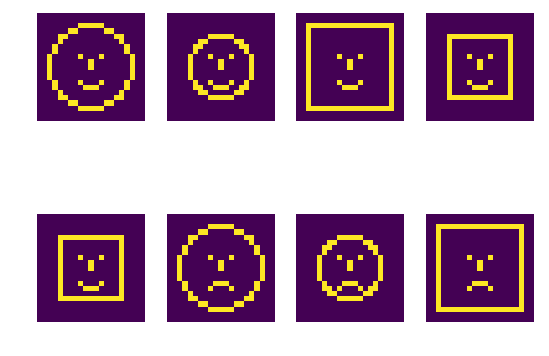

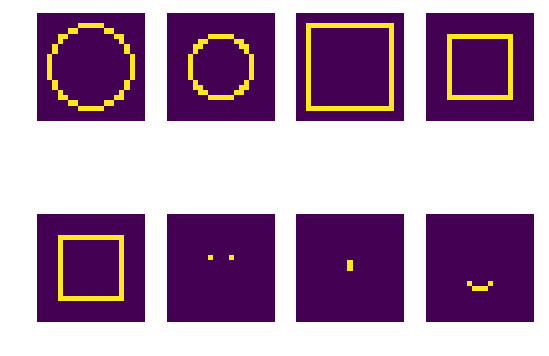

In [4]:
r=8
w1=np.zeros((21,21))
x1=np.array([np.arange(21)]).T
x2=np.array([np.arange(21)])
X1, X2=np.meshgrid(x1,x2)
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w1[x1c, x2c]=1
# plt.figure()
# plt.imshow(w1)
# plt.close()
r=6
w2=np.zeros((21,21))
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w2[x1c, x2c]=1
# plt.figure()
# plt.imshow(w2)
# plt.close()
r=8
w3=np.zeros((21,21))
w3[2*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[18*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[2:19 ,2*np.ones((1,17),dtype=np.int8)]=1
w3[2:19 ,18*np.ones((1,17),dtype=np.int8)]=1
# plt.imshow(w3)
r=6
w4=np.zeros((21,21))
w4[4*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[16*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[4:17, 4*np.ones((1,13),dtype=np.int8)]=1
w4[4:17, 16*np.ones((1,13),dtype=np.int8)]=1
# plt.imshow(w4)
w5=np.zeros((21,21))
w5[[8,8], [8,12]]=1;
# plt.imshow(w5)
w6=np.zeros((21,21))
w6[9:11, [10,10]]=1;
# plt.imshow(w6)
w7=np.zeros((21,21))
w7[[13,14,14,14,13], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w8=np.zeros((21,21))
w8[[14,13,13,13,14], [8,9,10,11,12]]=1;
# plt.imshow(w7)
# plt.imshow(w1+w5+w6+w8)
# w1, w2, w3, w4
# w5, w6
# w7
# w8
X=np.zeros((8,21*21))
X[0,:]=(w1+w5+w6+w7).reshape((1,21*21))
X[1,:]=(w2+w5+w6+w7).reshape((1,21*21))
X[2,:]=(w3+w5+w6+w7).reshape((1,21*21))
X[3,:]=(w4+w5+w6+w7).reshape((1,21*21))
X[4,:]=(w1+w5+w6+w8).reshape((1,21*21))
X[5,:]=(w2+w5+w6+w8).reshape((1,21*21))
X[6,:]=(w3+w5+w6+w8).reshape((1,21*21))
X[7,:]=(w4+w5+w6+w8).reshape((1,21*21))
X=X.T

W=np.zeros((8,21*21))
W[0,:]=w1.reshape((1,21*21))
W[1,:]=w2.reshape((1,21*21))
W[2,:]=w3.reshape((1,21*21))
W[3,:]=w4.reshape((1,21*21))
W[4,:]=w5.reshape((1,21*21))
W[5,:]=w6.reshape((1,21*21))
W[6,:]=w7.reshape((1,21*21))
W[7,:]=w8.reshape((1,21*21))
W=W.T


plt.figure()
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(X[:, i*3+j].reshape((21,21)))
    plt.axis('off')

plt.figure()
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow( W[:, i*3+j].reshape((21,21)))
    plt.axis('off')




Linear solution (pseudo inverse)

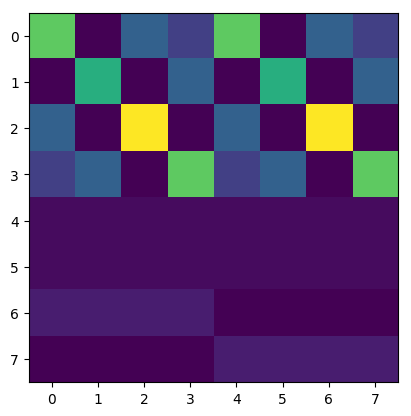

In [5]:
H=W.T@X
plt.figure()
plt.imshow(H)

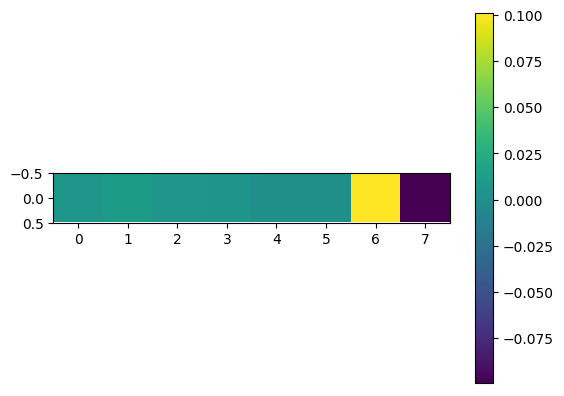

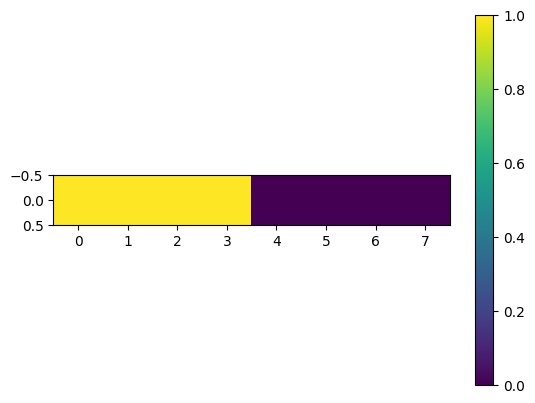

In [6]:
y=np.array([1,1,1,1,0,0,0,0])
W2=[np.linalg.pinv(H@H.T)@H@y.T]
# print(W2.shape)
plt.figure()
plt.imshow(W2)
plt.colorbar()

yh=W2@H
plt.figure()
plt.imshow(yh)
plt.colorbar()

# print(W2)

Logistic regression (gradient descent)

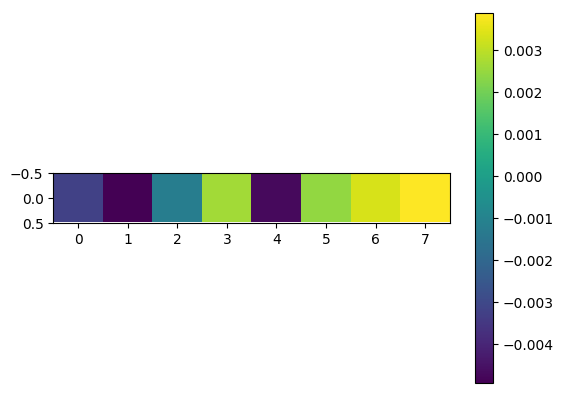

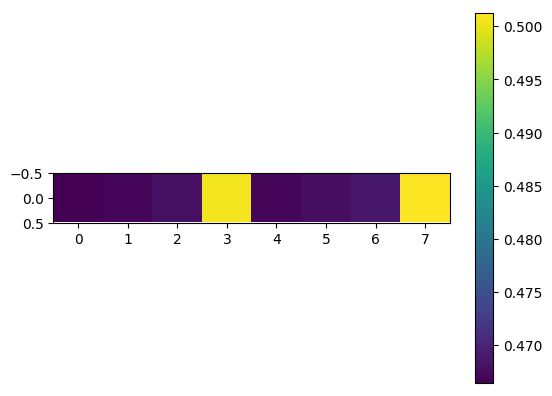

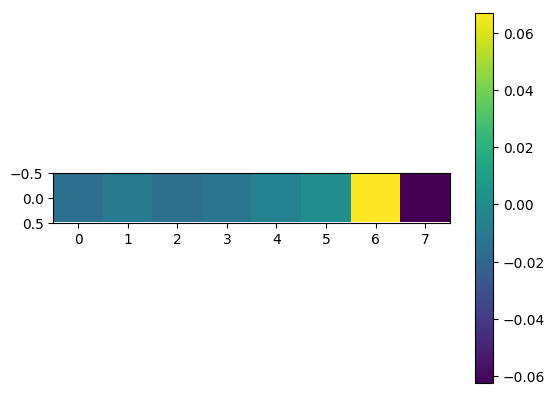

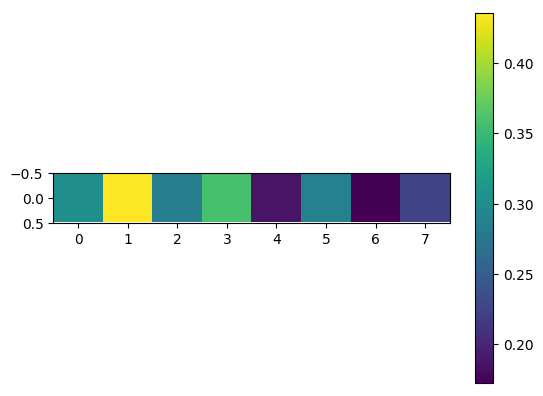

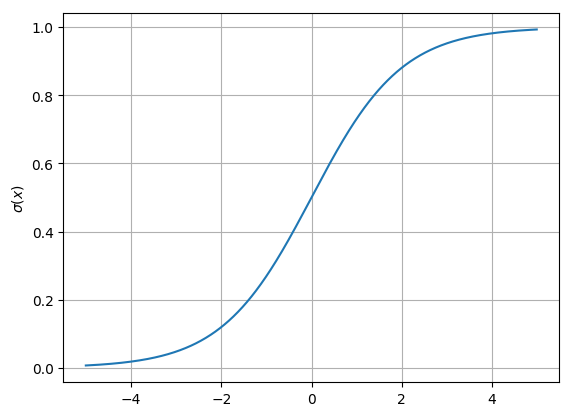

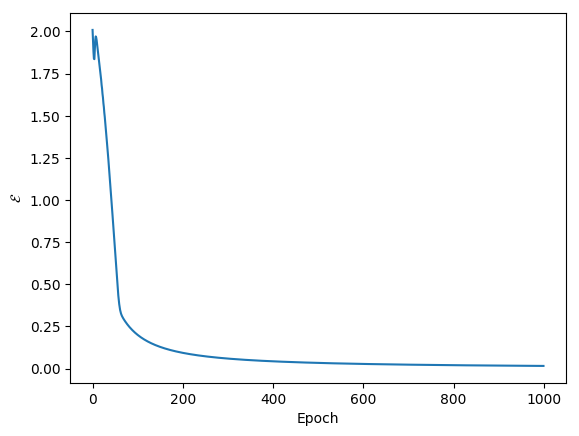

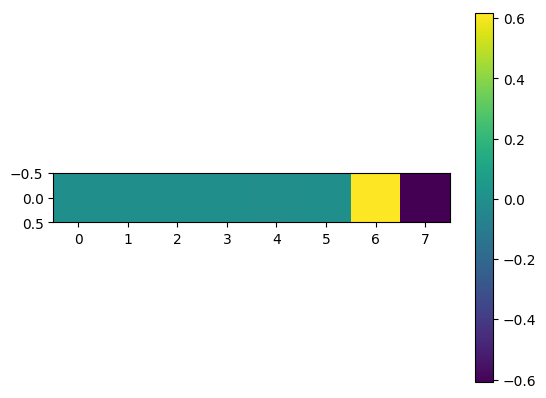

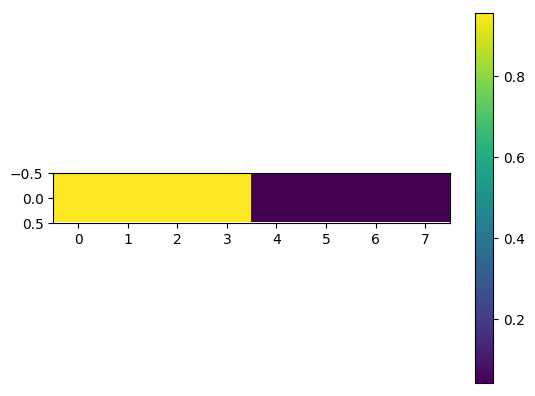

In [7]:
y=np.array([1,1,1,1,0,0,0,0])
W2=(np.random.rand(1,8)-0.5)*.01
def logit(x):
    return 1/(1+np.exp(-x))
def logitd(x):
    return logit(x)*(1-logit(x))
N=1000
lr=0.003
err=np.zeros(N)
for i in range(N):
    z=W2@H
    yh=logit(z)    
    if i is 0 or i is 10:
        plt.figure()
        plt.imshow(W2)
        plt.colorbar()
        plt.figure()
        plt.imshow(yh)
        plt.colorbar()    
    err[i]=np.sum((y-yh)**2)
    dW2=-((yh-y)*logitd(z))@H.T
    W2+=dW2*lr


        

plt.figure()
plt.plot(np.arange(-5,5,0.01), logit(np.arange(-5,5,0.01)))
plt.ylabel(r'$\sigma(x)$')
plt.grid('on')
plt.show()        
    
plt.figure()
plt.plot(err)
plt.xlabel('Epoch')
plt.ylabel(r'$\mathcal{E}$')
plt.show()    

plt.figure()
plt.imshow(W2)
plt.colorbar()

plt.figure()
plt.imshow(yh)
plt.colorbar()

Logistic regression (gradient descent), but with two output variables

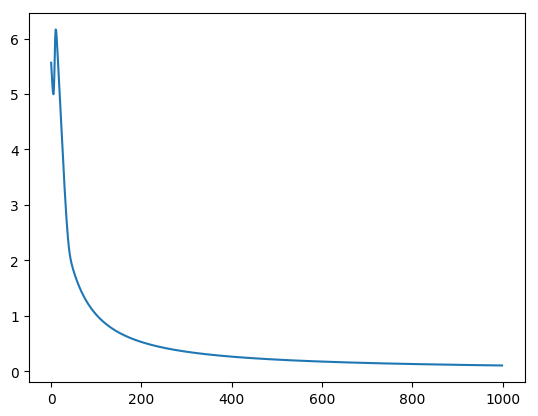

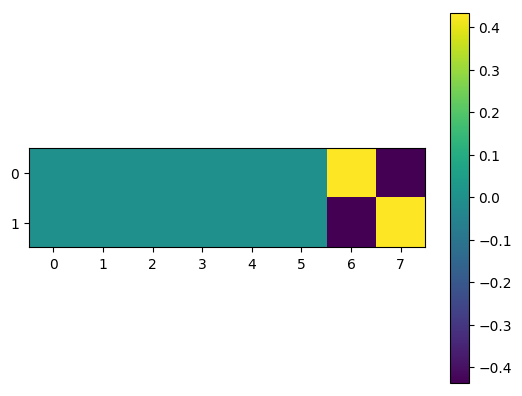

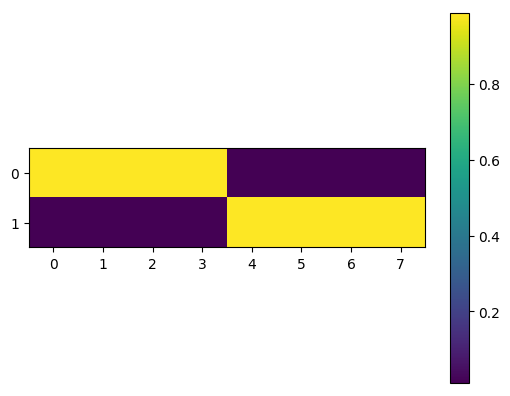

In [8]:
y=np.array([[1,1,1,1,0,0,0,0], [0,0,0,0,1,1,1,1]])
W2=(np.random.rand(2,8)-0.5)*.002
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0, keepdims=True)
N=1000
err=np.zeros(N)
for i in range(N):
    z=W2@H
    yh=softmax(z)
    err[i]=np.sum(-y*np.log(yh))
    dW2=-(yh-y)@H.T
    lr=0.0004
    W2+=dW2*lr

plt.figure()
plt.plot(err)
plt.show()    

plt.figure()
plt.imshow(W2)
plt.colorbar()

plt.figure()
plt.imshow(yh)
plt.colorbar()
